In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# installing the needed libraries

!pip install pyLDAvis --upgrade --quiet
!pip install opendatasets --upgrade --quiet
!pip install gensim --upgrade --quiet
!pip install nltk --upgrade --quiet
!pip install pyLDAvis --upgrade --quiet
!pip install spacy --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install textblob --upgrade --quiet
!pip install plotly  --upgrade --quiet
!pip install chart_studio --upgrade --quiet
!pip install cufflinks --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install statsmodels --upgrade --quiet
!pip install bs4 --upgrade --quiet


In [5]:
# importing all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pprint import pprint
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim


# natural language toolkit is used to download stopwords, vader lexicon & punkt
nltk.download(["stopwords","vader_lexicon","punkt"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# the relevant libraries are imported
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import re

customer_review = []

# each page is looped through to extract data to be appended to the customer_review list
for i in range(1,355):
  url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
  ba_reviews = requests.get(url)
  response = ba_reviews.content
  soup = BeautifulSoup(response, 'html.parser')

  first_article = soup.find('article', class_='comp comp_reviews-airline querylist position-content')
  review_articles = first_article.find_all('article', {'itemprop': 'review'})

  for review in review_articles:
      def reviewer_name():
        reviewer = review.find('span', itemprop="name").text
        if reviewer is None:
          return None
        else:
          return reviewer

      def general_rating():
        rating_element = review.find('span', itemprop="ratingValue")
        if rating_element is not None:
            return rating_element.text
        else:
            pass

      def comm_head():
        comment_header = review.find('h2',  class_="text_header").text
        if comment_header is None:
          return None
        else:
          return comment_header

      def comment_body():
        comment = review.find('div',  class_="text_content").text
        if comment is None:
          return None
        else:
          return comment

      def aircraft():
          first_td = review.find('td', class_='review-rating-header aircraft')
          if first_td is None:
              return None
          else:
              return first_td.find_next_sibling('td', class_="review-value").text

      def trav_type():
          traveller_td = review.find('td', class_='review-rating-header type_of_traveller')
          if traveller_td is None:
              return None
          else:
              return traveller_td.find_next_sibling('td', class_="review-value").text

      def seated_type():
          seat_td = review.find('td', class_='review-rating-header cabin_flown')
          if seat_td is None:
              return None
          else:
              return seat_td.find_next_sibling('td', class_="review-value").text

      def route_type():
          route_td = review.find('td', class_='review-rating-header route')
          if route_td is None:
              return None
          else:
              return route_td.find_next_sibling('td', class_="review-value").text

      def date_flown_func():
          date_flown_td = review.find('td', class_='review-rating-header date_flown')
          if date_flown_td is None:
              return None
          else:
              return date_flown_td.find_next_sibling('td', class_="review-value").text

      def seat_comfy():
          seat_comfort_header = review.find('td', class_="review-rating-header seat_comfort")
          if seat_comfort_header is None:
              return None
          else:
              seat_comfort = seat_comfort_header.parent
              filled_stars = seat_comfort.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def wify():
          wifi_header = review.find('td', class_="review-rating-header wifi_and_connectivity")
          if wifi_header is None:
              return None
          else:
              wifi = wifi_header.parent
              filled_stars = wifi.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def cabin_staff():
          cabin_staff_services = review.find('td', class_="review-rating-header cabin_staff_service")
          if cabin_staff_services is None:
              return None
          else:
              cabin_staff_service = cabin_staff_services.parent
              filled_stars = cabin_staff_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def f_b():
          food_and_bev = review.find('td', class_="review-rating-header food_and_beverages")
          if food_and_bev is None:
              return None
          else:
              food_and_beverages = food_and_bev.parent
              filled_stars = food_and_beverages.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def recommended():
          first_td = review.find('td', class_="review-rating-header recommended")
          if first_td is None:
              return None
          else:
            second_td = first_td.find_next_sibling('td', class_="review-value rating-no")
            return 0 if second_td else 1

      def inflight_ent():
          inflight_enter = review.find('td', class_="review-rating-header inflight_entertainment")
          if inflight_enter is None:
              return None
          else:
              flight_ent = inflight_enter.parent
              filled_stars = flight_ent.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def ground_service():
          ground_services = review.find('td', class_="review-rating-header ground_service")
          if ground_services is None:
              return None
          else:
              g_service = ground_services.parent
              filled_stars = g_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def val_money():
          value_for_money = review.find('td', class_="review-rating-header value_for_money")
          v_for_money = value_for_money.parent
          filled_stars = v_for_money.find_all('span', class_ = "star fill")
          return max([star.text for star in filled_stars]) if filled_stars else None

      customer_review.append([reviewer_name(), general_rating(), comm_head(), comment_body(),
                              aircraft(), trav_type(), seated_type(), route_type(), date_flown_func(),
                              seat_comfy(), wify(), cabin_staff(), f_b(), inflight_ent(), ground_service(), val_money(), recommended()])




In [9]:
# customer_view list is used to create a dataframe
df = pd.DataFrame(customer_review, columns=['reviewer', 'overall rating', 'comment head', 'comment body',
                                            'aircraft', 'travel type', 'seat type', 'route', 'date flown',
                                            'seat comfort', 'wifi', 'cabin services', 'food & drink', 'entertainment',
                                            'ground services', 'value_money', 'recommended'])
df.head()


,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,J Tydeman,4,"""Very second rate shoddy airline""",Not Verified | Flew with BA to Punta Cana. To...,None,Couple Leisure,Economy Class,London Gatwick to Punta Cana,October 2023,3,None,3,3,2,2,2,0
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",✅ Trip Verified | They downgraded me from bu...,None,Solo Leisure,Business Class,London to Hong Kong,July 2023,1,None,5,3,3,5,1,0
2,Glenn Taylor-Biffen,1,"""Never again BA""",✅ Trip Verified | The already delayed aircra...,A320,Couple Leisure,Economy Class,Catania to Gatwick,October 2023,1,None,1,1,None,1,1,0
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",✅ Trip Verified | Caught up in the Gatwick c...,None,Couple Leisure,Economy Class,Gatwick to Venice,September 2023,None,None,None,None,None,1,1,0
4,S Harten,1,"""Boarding flight took an hour""",✅ Trip Verified | BA has a real problem with...,A321,Solo Leisure,Economy Class,Berlin to London,October 2023,3,None,1,1,None,1,1,0


In [11]:
# regex is used to drop some unwanted text/characters from the comment column
pattern = r'✅ Trip Verified \| |Not Verified \| |❎ Not Verified \| |✅ Verified Review \| |\✅ Trip Verified \|'
df['comment body'] = df['comment body'].str.replace(pattern, '', regex=True)

df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,None,Couple Leisure,Economy Class,London Gatwick to Punta Cana,October 2023,3,None,3,3,2,2,2,0
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,None,Solo Leisure,Business Class,London to Hong Kong,July 2023,1,None,5,3,3,5,1,0
2,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,A320,Couple Leisure,Economy Class,Catania to Gatwick,October 2023,1,None,1,1,None,1,1,0
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,None,Couple Leisure,Economy Class,Gatwick to Venice,September 2023,None,None,None,None,None,1,1,0
4,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,A321,Solo Leisure,Economy Class,Berlin to London,October 2023,3,None,1,1,None,1,1,0


In [12]:
df.columns

Index(['reviewer', 'overall rating', 'comment head', 'comment body',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'wifi', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended'],
      dtype='object')

In [13]:
# Replace all NaN values with 0
df.fillna(0, inplace=True)

# check for missing values
num_columns_with_missing_values = df.isnull().any().sum()
print("Number of columns with missing values:", num_columns_with_missing_values)


Number of columns with missing values: 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer         3540 non-null   object
 1   overall rating   3540 non-null   object
 2   comment head     3540 non-null   object
 3   comment body     3540 non-null   object
 4   aircraft         3540 non-null   object
 5   travel type      3540 non-null   object
 6   seat type        3540 non-null   object
 7   route            3540 non-null   object
 8   date flown       3540 non-null   object
 9   seat comfort     3540 non-null   object
 10  wifi             3540 non-null   object
 11  cabin services   3540 non-null   object
 12  food & drink     3540 non-null   object
 13  entertainment    3540 non-null   object
 14  ground services  3540 non-null   object
 15  value_money      3540 non-null   object
 16  recommended      3540 non-null   int64 
dtypes: int64(1), object(16)
memory us

In [15]:
# List of columns to convert
cols_to_convert = ['overall rating', 'seat comfort', 'cabin services', 'food & drink', 'entertainment', 'ground services', 'value_money', 'recommended']

# Convert specific columns to numeric
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# convert date flown column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewer         3540 non-null   object        
 1   overall rating   3540 non-null   int64         
 2   comment head     3540 non-null   object        
 3   comment body     3540 non-null   object        
 4   aircraft         3540 non-null   object        
 5   travel type      3540 non-null   object        
 6   seat type        3540 non-null   object        
 7   route            3540 non-null   object        
 8   date flown       3540 non-null   datetime64[ns]
 9   seat comfort     3540 non-null   int64         
 10  wifi             3540 non-null   object        
 11  cabin services   3540 non-null   int64         
 12  food & drink     3540 non-null   int64         
 13  entertainment    3540 non-null   int64         
 14  ground services  3540 non-null   int64  

In [16]:
df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0,Couple Leisure,Economy Class,London Gatwick to Punta Cana,2023-10-01,3,0,3,3,2,2,2,0
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0,Solo Leisure,Business Class,London to Hong Kong,2023-07-01,1,0,5,3,3,5,1,0
2,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,A320,Couple Leisure,Economy Class,Catania to Gatwick,2023-10-01,1,0,1,1,0,1,1,0
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0,Couple Leisure,Economy Class,Gatwick to Venice,2023-09-01,0,0,0,0,0,1,1,0
4,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,A321,Solo Leisure,Economy Class,Berlin to London,2023-10-01,3,0,1,1,0,1,1,0


In [17]:
df.tail()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
3535,Luke Toornent,7,British Airways customer review,I flew AMS-LGW-MCO and JFK-LHR-AMS this month....,0,0,Economy Class,0,1970-01-01,2,0,4,4,3,0,4,1
3536,Karagounis Paul,10,British Airways customer review,LHR-PEK-LHR. We travel BA club world often and...,0,0,Business Class,0,1970-01-01,5,0,5,4,4,0,5,1
3537,C Denson,6,British Airways customer review,World Traveller Plus from Beijing to London LH...,0,0,Premium Economy,0,1970-01-01,3,0,4,3,1,0,3,0
3538,A Mackenzie,5,British Airways customer review,CPH-LHR 26th June. Club Europe. BA standards a...,0,0,Business Class,0,1970-01-01,5,0,5,4,1,0,4,1
3539,C Denson,5,British Airways customer review,London LHR to Hong Kong on 27 May. Was really ...,0,0,Premium Economy,0,1970-01-01,4,0,2,3,3,0,3,0


In [18]:
df.shape

(3540, 17)

In [19]:
# printing the number of unique values for date flown column
print(df['date flown'].dt.year.unique())

# printing the minimum year in the date flown column
print(df['date flown'].dt.year.min())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 1970]
1970


In [20]:
# printing the number of rows with year less than 2014
print(len(df[df['date flown'].dt.year < 2014]))

643


In [21]:
# remove the entire row of any 'date flown' with year older than 2014
df = df[df['date flown'].dt.year >= 2014]

In [22]:
# Cross check number of unique values for date flown column after removing rows with year less than 2014
print(df['date flown'].dt.year.unique())

# printing the minimum year in the date flown column after removing rows with year less than 2014
print(df['date flown'].dt.year.min())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
2014


In [23]:
df.shape

(2897, 17)

In [24]:
print(df[df['date flown'].dt.year == 2014]['date flown'])

2651   2014-12-01
2779   2014-09-01
2836   2014-09-01
2839   2014-12-01
2855   2014-08-01
2866   2014-10-01
2869   2014-11-01
2870   2014-11-01
2884   2014-07-01
Name: date flown, dtype: datetime64[ns]


# SENTIMENT ANALYSIS

VADER(Valence Aware Dictionary and Sentiment Reasoner) 

In [25]:
# relevants columns are selected for VADER sentiment analysis
df_sentiment = df[['reviewer', 'overall rating', 'comment head', 'comment body' ]]

reviews = df_sentiment['comment body']


In [26]:
# using the VADER pre-trained sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define the get_sentiment_scores function
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

In [27]:
# apply the get_sentiment_scores function to each review
df_sentiment['sentiment_scores'] = reviews.apply(get_sentiment_scores)

In [28]:
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,sentiment_scores
0,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,"{'neg': 0.059, 'neu': 0.922, 'pos': 0.019, 'co..."
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,"{'neg': 0.15, 'neu': 0.767, 'pos': 0.083, 'com..."
2,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,"{'neg': 0.107, 'neu': 0.844, 'pos': 0.048, 'co..."
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,"{'neg': 0.035, 'neu': 0.874, 'pos': 0.09, 'com..."
4,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,"{'neg': 0.069, 'neu': 0.907, 'pos': 0.024, 'co..."


In [29]:
'''The negative, neutral, and positive scores represent the proportion of the text that falls into each category, 
while the compound score represents an aggregated score that ranges from -1 (most negative) to 1 (most positive) 
and reflects the overall sentiment of the text.'''

# create new columns for each sentiment score
df_sentiment['vader_neg'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neg'])
df_sentiment['vader_neu'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neu'])
df_sentiment['vader_pos'] = df_sentiment['sentiment_scores'].apply(lambda x: x['pos'])
df_sentiment['vader_compound'] = df_sentiment['sentiment_scores'].apply(lambda x: x['compound'])

# drop the original sentiment_scores column
df_sentiment.drop('sentiment_scores', axis=1, inplace=True)

df_sentiment.head()

,reviewer,overall rating,comment head,comment body,vader_neg,vader_neu,vader_pos,vader_compound
0,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0.059,0.922,0.019,-0.6127
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0.150,0.767,0.083,-0.9273
2,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,0.107,0.844,0.048,-0.8614
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0.035,0.874,0.090,0.8674
4,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,0.069,0.907,0.024,-0.5844


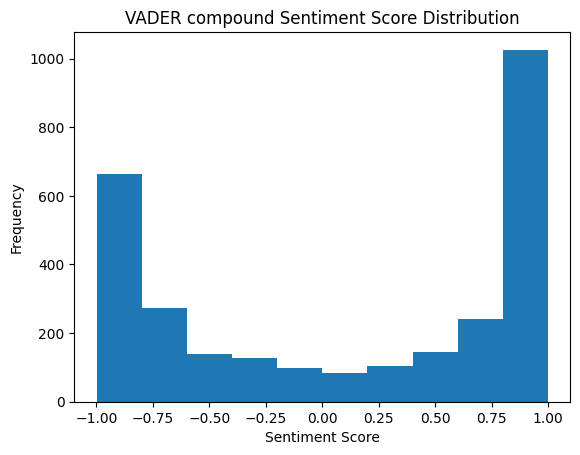

In [30]:
# visual distribution of sentiment scores in a histogram
plt.hist(df_sentiment["vader_compound"])
plt.title("VADER compound Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

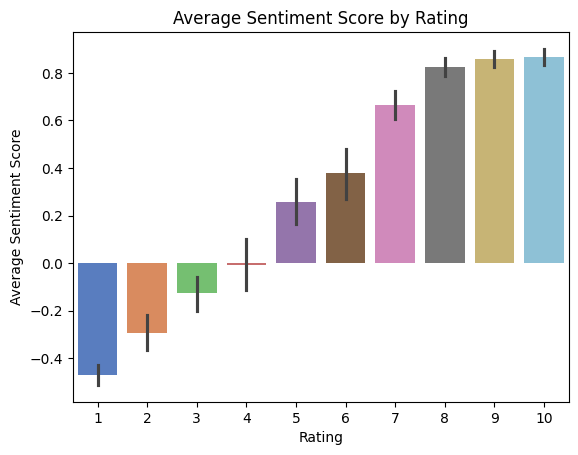

In [33]:
'''bar plot of the average VADER sentiment score for each rating category'''

'''the overall rating should skew towards the direction of the sentiment score.
if the rating is high, the sentiment score should also be high and vice versa'''

# Filter out rows where 'overall rating' is 0
df_sentiment_filtered = df_sentiment[df_sentiment['overall rating'] != 0]

# Create the bar plot with the color palette
ax = sns.barplot(x="overall rating", y="vader_compound", data=df_sentiment_filtered, palette="muted")
ax.set_title("Average Sentiment Score by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Sentiment Score")
plt.show()


In [34]:
# categorizing the sentiment as "negative", "neutral", or "positive" based on the value of the score
def map_sentiment(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'

df_sentiment['vader_sentiment_category'] = df_sentiment['vader_compound'].apply(map_sentiment)
df_sentiment.head()


,reviewer,overall rating,comment head,comment body,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category
0,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0.059,0.922,0.019,-0.6127,negative
1,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0.150,0.767,0.083,-0.9273,negative
2,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,0.107,0.844,0.048,-0.8614,negative
3,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0.035,0.874,0.090,0.8674,positive
4,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,0.069,0.907,0.024,-0.5844,negative


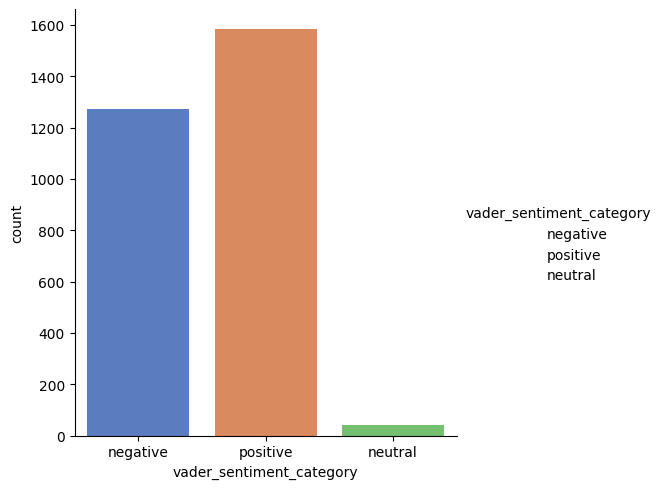

In [36]:
'''to get a clearer picture of the customer sentiment, they are grouped
according to their sentiment score. They are in 3 distinct groups of
positive, neutral and negative. The catplot below is a graphical
representation of the result.'''


sns.catplot(x='vader_sentiment_category', kind='count', data=df_sentiment, palette="muted")